In [59]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import os
from PIL import Image
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.model_selection import train_test_split

%matplotlib inline

In [60]:
train_path = os.getcwd()+'/data/BasicFinalDatabase/Train'
folders = []
[folders.append('/'+i) for i in sorted(os.listdir(train_path))]
label_map = ['অ','আ','ই ','ঈ','উ','ঊ','ঋ','এ','ঐ','ও','ঔ',
             'ক','খ','গ','ঘ','ঙ',
             'চ','ছ','জ','ঝ','ঞ', 
             'ট','ঠ','ড','ঢ','ণ',
             'ত','থ','দ','ধ','ন',
             'প','ফ','ব','ভ','ম',
             'য','র','ল',
             'শ','ষ','স','হ',
             'য়','ড়','ঢ়','ৎ','ং','ঃ','ঁ']
Temp = []
for folder in folders:
    
    images = os.listdir((train_path+folder))
    temp = []
    for image in images:
        img = Image.open(train_path+folder+'/'+image).convert('L')
        img = img.resize((32,32))
        arr = np.array(img)[..., np.newaxis]
        #arr = np.true_divide(arr,[255.0],out=None)
        arr = arr / 255.0
        Temp.append(arr)
X_orig = np.stack(Temp)
print(X_orig.shape)
print(np.mean(X_orig))
print(np.std(X_orig))

(12000, 32, 32, 1)
0.4170046227149713
0.2604762823875557


In [61]:
Y_orig = []
[Y_orig.extend([bc]*240) for bc in range(len(label_map))]
Y_orig = np.stack(Y_orig)
Y_orig = keras.utils.to_categorical(Y_orig, len(np.unique(Y_orig)))
#print(Y_orig)

In [62]:
indices = np.arange(X_orig.shape[0])
np.random.shuffle(indices)
X_orig = X_orig[indices]
Y_orig = Y_orig[indices]

print(X_orig.shape,Y_orig.shape)

(12000, 32, 32, 1) (12000, 50)


In [63]:
test_path = os.getcwd()+'/data/BasicFinalDatabase/Test'
folders = []
[folders.append('/'+i) for i in sorted(os.listdir(test_path))]

Temp2 = []
for folder in folders:
    
    images = os.listdir((test_path+folder))
    for image in images:
        img = Image.open(test_path+folder+'/'+image).convert('L')
        img = img.resize((32,32))
        arr = np.array(img)[..., np.newaxis]
        #arr = np.true_divide(arr,[255.0],out=None)
        arr = arr / 255.0
        Temp2.append(arr)

X_test = np.stack(Temp2)
print(X_test.shape)

(3000, 32, 32, 1)


In [64]:
Y_test = []
[Y_test.extend([bc]*60) for bc in range(len(label_map))]
Y_test = np.stack(Y_test)
Y_test = keras.utils.to_categorical(Y_test, len(np.unique(Y_test)))
print(Y_test.shape)

(3000, 50)


In [65]:
indices = np.arange(X_test.shape[0])
np.random.shuffle(indices)
X_test = X_test[indices]
Y_test = Y_test[indices]

print(X_test.shape,Y_test.shape)

(3000, 32, 32, 1) (3000, 50)


In [66]:
X_train,X_dev,Y_train,Y_dev = train_test_split(X_orig, Y_orig, test_size=0.2, shuffle=False)
X_train.shape,Y_train.shape,X_dev.shape,Y_dev.shape

((9600, 32, 32, 1), (9600, 50), (2400, 32, 32, 1), (2400, 50))

In [67]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(50, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adagrad(),
              metrics=['accuracy'])

obj = model.fit(X_train, Y_train,
          batch_size=120,
          epochs=12,
          verbose=1,
          validation_data=(X_dev, Y_dev))
print(obj)

Train on 9600 samples, validate on 2400 samples
Epoch 1/12
9600/9600 [==============================] - 18s 2ms/step - loss: 3.0645 - acc: 0.2128 - val_loss: 1.8066 - val_acc: 0.5354
Epoch 2/12
9600/9600 [==============================] - 16s 2ms/step - loss: 1.6711 - acc: 0.5281 - val_loss: 1.2800 - val_acc: 0.6425
Epoch 3/12
9600/9600 [==============================] - 16s 2ms/step - loss: 1.2931 - acc: 0.6265 - val_loss: 1.0044 - val_acc: 0.7242
Epoch 4/12
9600/9600 [==============================] - 17s 2ms/step - loss: 1.1087 - acc: 0.6723 - val_loss: 0.8973 - val_acc: 0.7533
Epoch 5/12
9600/9600 [==============================] - 20s 2ms/step - loss: 0.9691 - acc: 0.7158 - val_loss: 0.8086 - val_acc: 0.7675
Epoch 6/12
9600/9600 [==============================] - 16s 2ms/step - loss: 0.9099 - acc: 0.7285 - val_loss: 0.7710 - val_acc: 0.7783
Epoch 7/12
9600/9600 [==============================] - 18s 2ms/step - loss: 0.8201 - acc: 0.7502 - val_loss: 0.7420 - val_acc: 0.7871
Epoch 8

In [68]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

3000/3000 [==============================] - 2s 593us/step
Test loss: 0.628835546652476
Test accuracy: 0.8159999998410543


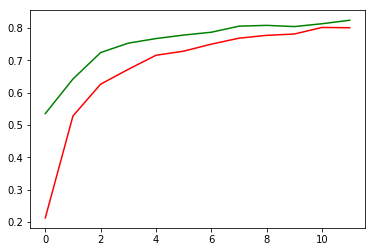

In [69]:
plt.plot(range(12),obj.history['acc'],'r-',range(12),obj.history['val_acc'],'g-')

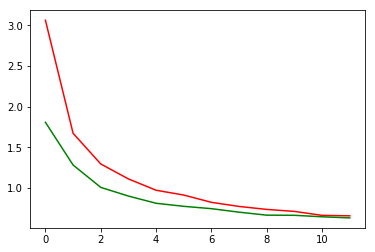

In [70]:
plt.plot(range(12),obj.history['loss'],'r-',range(12),obj.history['val_loss'],'g-')

In [71]:
model.save('bangla-dl.h5')